In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
#read excel sheet
xls = pd.ExcelFile('../AI-ML Tractor Analytics/DataSet.xlsx')
sales = pd.read_excel(xls,'Sales Data')
historic = pd.read_excel(xls,'HISTORY_DAY')
climatology = pd.read_excel(xls,'CLIMATOLOGY_DAY')
forecast = pd.read_excel(xls,'FORECAST_DAY')

In [6]:
temp = historic.copy()

rows = historic.shape[0]
vals = list()
print("Processing: 0%[",end="")
p = rows//100
for i in range(rows):
    if i%p == 0:
        print("=>",end="")
    s = "".join(str(temp["DATE_VALID_STD"][i]).split()[0].split("-"))
    s = s + "-" + str(temp["SCRUB_STORE_NO"][i])
    vals.append(s)
print("=>]100%")

Processing: 0%[=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>]100%


In [10]:
temp = sales.copy()

rows = sales.shape[0]
vals = list()
print("Processing: 0%[",end="")
p = rows//100
for i in range(rows):
    if i%p == 0:
        print("=>",end="")
    s = str(temp["TIME_DIM_KEY"][i]) + "-" + str(temp["SCRUB_STORE_NO"][i])
    vals.append(s)
print("=>]100%")

Processing: 0%[=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>]100%


In [11]:
sales["unique_ID"] = vals

In [12]:
sales.head()

,TIME_DIM_KEY,SCRUB_STORE_NO,SALES_UNITS,unique_ID
0,20160102,1,759,20160102-1
1,20160103,1,486,20160103-1
2,20160104,1,326,20160104-1
3,20160105,1,395,20160105-1
4,20160106,1,478,20160106-1


In [13]:
historic.iloc[:,3:].head()

,DOY_STD,MIN_TEMPERATURE_AIR_2M_F,AVG_TEMPERATURE_AIR_2M_F,MAX_TEMPERATURE_AIR_2M_F,MIN_TEMPERATURE_WETBULB_2M_F,AVG_TEMPERATURE_WETBULB_2M_F,MAX_TEMPERATURE_WETBULB_2M_F,MIN_TEMPERATURE_DEWPOINT_2M_F,AVG_TEMPERATURE_DEWPOINT_2M_F,MAX_TEMPERATURE_DEWPOINT_2M_F,...,TOT_SNOWFALL_IN,TOT_SNOWDEPTH_IN,MIN_CLOUD_COVER_TOT_PCT,AVG_CLOUD_COVER_TOT_PCT,MAX_CLOUD_COVER_TOT_PCT,MIN_RADIATION_SOLAR_TOTAL_WPM2,AVG_RADIATION_SOLAR_TOTAL_WPM2,MAX_RADIATION_SOLAR_TOTAL_WPM2,TOT_RADIATION_SOLAR_TOTAL_WPM2,unique_ID
0,2,26.5,30.4,34.5,25.1,28.7,32.5,21.9,25.5,29.8,...,0.0,16.1,0,57,100,0,32.3,132.0,776.0,20160102-1
1,3,26.0,29.1,31.6,24.5,27.2,30.2,18.6,23.3,27.9,...,0.0,15.4,73,94,100,0,49.6,236.0,1190.0,20160103-1
2,4,8.3,19.2,25.7,7.9,17.8,25.3,6.1,13.5,24.9,...,0.0,15.5,11,50,94,0,93.2,415.0,2238.0,20160104-1
3,5,6.2,19.1,28.7,6.0,18.0,27.2,5.2,15.3,24.4,...,0.0,15.3,19,81,99,0,52.6,214.0,1262.0,20160105-1
4,6,24.7,29.6,35.7,23.7,27.8,33.2,21.1,24.4,29.2,...,0.0,15.2,0,63,100,0,80.3,383.0,1928.0,20160106-1


In [14]:
dataset = sales.merge(historic.iloc[:,3:], on="unique_ID", how="left")

In [15]:
dataset.head()

,TIME_DIM_KEY,SCRUB_STORE_NO,SALES_UNITS,unique_ID,DOY_STD,MIN_TEMPERATURE_AIR_2M_F,AVG_TEMPERATURE_AIR_2M_F,MAX_TEMPERATURE_AIR_2M_F,MIN_TEMPERATURE_WETBULB_2M_F,AVG_TEMPERATURE_WETBULB_2M_F,...,TOT_PRECIPITATION_IN,TOT_SNOWFALL_IN,TOT_SNOWDEPTH_IN,MIN_CLOUD_COVER_TOT_PCT,AVG_CLOUD_COVER_TOT_PCT,MAX_CLOUD_COVER_TOT_PCT,MIN_RADIATION_SOLAR_TOTAL_WPM2,AVG_RADIATION_SOLAR_TOTAL_WPM2,MAX_RADIATION_SOLAR_TOTAL_WPM2,TOT_RADIATION_SOLAR_TOTAL_WPM2
0,20160102,1,759,20160102-1,2,26.5,30.4,34.5,25.1,28.7,...,0.0,0.0,16.1,0,57,100,0,32.3,132.0,776.0
1,20160103,1,486,20160103-1,3,26.0,29.1,31.6,24.5,27.2,...,0.0,0.0,15.4,73,94,100,0,49.6,236.0,1190.0
2,20160104,1,326,20160104-1,4,8.3,19.2,25.7,7.9,17.8,...,0.0,0.0,15.5,11,50,94,0,93.2,415.0,2238.0
3,20160105,1,395,20160105-1,5,6.2,19.1,28.7,6.0,18.0,...,0.0,0.0,15.3,19,81,99,0,52.6,214.0,1262.0
4,20160106,1,478,20160106-1,6,24.7,29.6,35.7,23.7,27.8,...,0.0,0.0,15.2,0,63,100,0,80.3,383.0,1928.0


In [16]:
def smooth(y, box_pts):
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, mode='same')
    return y_smooth

# code check

In [26]:
second_data_col = "AVG_TEMPERATURE_WETBULB_2M_F"
store = 10
smooth_factor = 20

'''---------------------------------------------------------------------------------------------------------'''

sales_units = dataset[dataset["SCRUB_STORE_NO"] == store]["SALES_UNITS"].to_numpy()
second_data = dataset[dataset["SCRUB_STORE_NO"] == store][second_data_col].to_numpy()

smooth_sales_units = smooth(sales_units,smooth_factor)
smooth_second_data = smooth(second_data,smooth_factor)

y = [i for i in range(1,len(second_data)+1)]

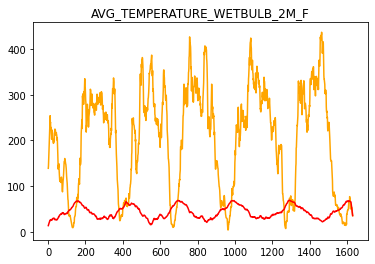

In [27]:
plt.plot(y,smooth_sales_units,color ='orange')
plt.plot(y,smooth_second_data,color ='red')
plt.title(second_data_col)
plt.show()

# Plotting

In [28]:
#get all the columns
cols = list(dataset.columns)[5:]
cols

['MIN_TEMPERATURE_AIR_2M_F',
 'AVG_TEMPERATURE_AIR_2M_F',
 'MAX_TEMPERATURE_AIR_2M_F',
 'MIN_TEMPERATURE_WETBULB_2M_F',
 'AVG_TEMPERATURE_WETBULB_2M_F',
 'MAX_TEMPERATURE_WETBULB_2M_F',
 'MIN_TEMPERATURE_DEWPOINT_2M_F',
 'AVG_TEMPERATURE_DEWPOINT_2M_F',
 'MAX_TEMPERATURE_DEWPOINT_2M_F',
 'MIN_TEMPERATURE_FEELSLIKE_2M_F',
 'AVG_TEMPERATURE_FEELSLIKE_2M_F',
 'MAX_TEMPERATURE_FEELSLIKE_2M_F',
 'MIN_TEMPERATURE_WINDCHILL_2M_F',
 'AVG_TEMPERATURE_WINDCHILL_2M_F',
 'MAX_TEMPERATURE_WINDCHILL_2M_F',
 'MIN_TEMPERATURE_HEATINDEX_2M_F',
 'AVG_TEMPERATURE_HEATINDEX_2M_F',
 'MAX_TEMPERATURE_HEATINDEX_2M_F',
 'MIN_HUMIDITY_RELATIVE_2M_PCT',
 'AVG_HUMIDITY_RELATIVE_2M_PCT',
 'MAX_HUMIDITY_RELATIVE_2M_PCT',
 'MIN_HUMIDITY_SPECIFIC_2M_GPKG',
 'AVG_HUMIDITY_SPECIFIC_2M_GPKG',
 'MAX_HUMIDITY_SPECIFIC_2M_GPKG',
 'MIN_PRESSURE_2M_MB',
 'AVG_PRESSURE_2M_MB',
 'MAX_PRESSURE_2M_MB',
 'MIN_PRESSURE_TENDENCY_2M_MB',
 'AVG_PRESSURE_TENDENCY_2M_MB',
 'MAX_PRESSURE_TENDENCY_2M_MB',
 'MIN_PRESSURE_MEAN_SEA_LEVEL_M

In [23]:
def plot(second_data_col, store = 1, smooth_factor = 10):
    
    sales_units = dataset[dataset["SCRUB_STORE_NO"] == store]["SALES_UNITS"].to_numpy()
    second_data = dataset[dataset["SCRUB_STORE_NO"] == store][second_data_col].to_numpy()

    smooth_sales_units = smooth(sales_units,smooth_factor)
    smooth_second_data = smooth(second_data,smooth_factor)

    y = [i for i in range(1,len(second_data)+1)]
    
    plt.plot(y,smooth_sales_units,color ='orange')
    plt.plot(y,smooth_second_data,color ='red')
    plt.title(second_data_col)
    plt.show()

Store No. 1


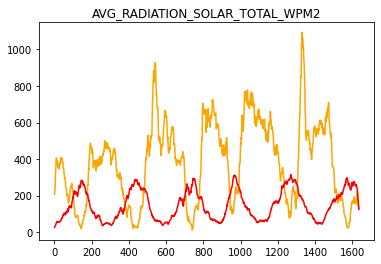

Store No. 2


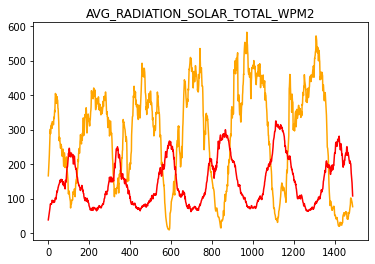

Store No. 3


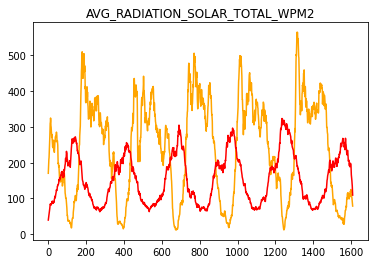

Store No. 4


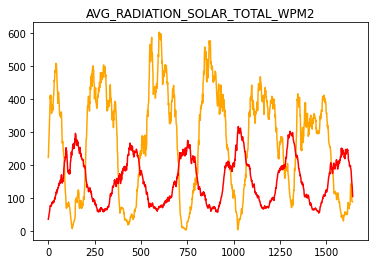

Store No. 5


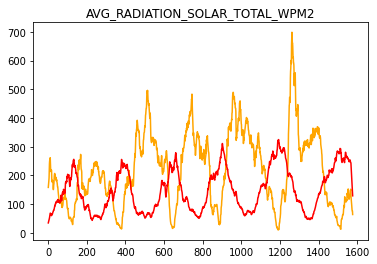

Store No. 6


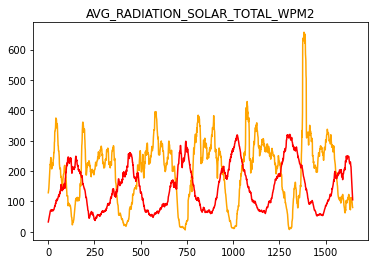

Store No. 7


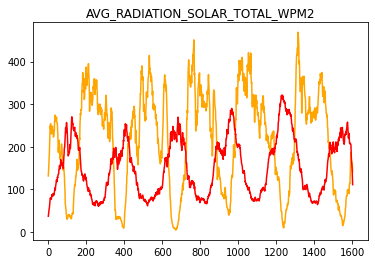

Store No. 8


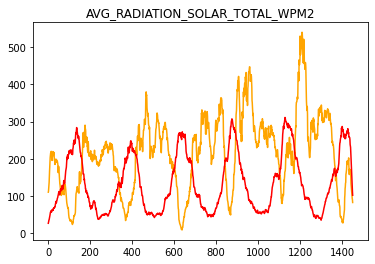

Store No. 9


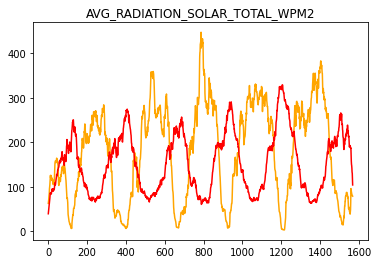

Store No. 10


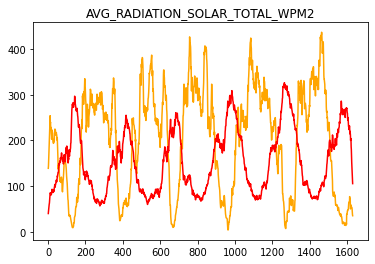

Store No. 11


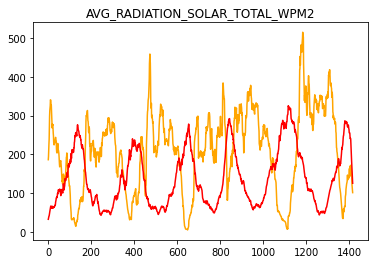

Store No. 12


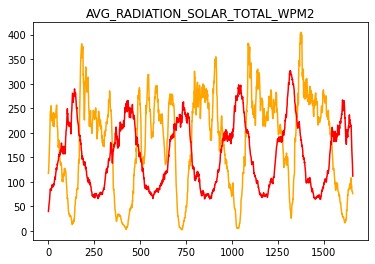

Store No. 13


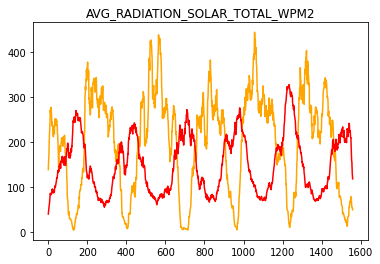

Store No. 14


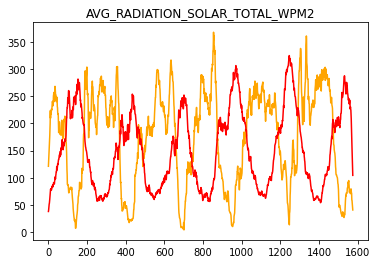

Store No. 15


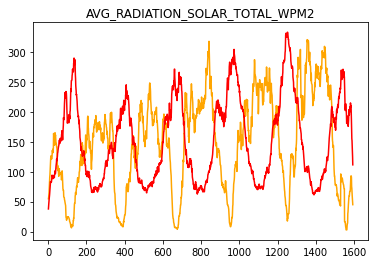

Store No. 16


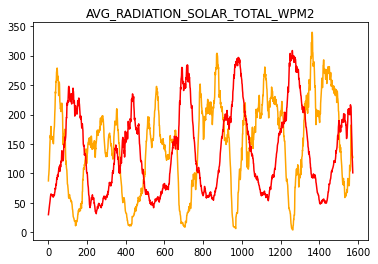

Store No. 17


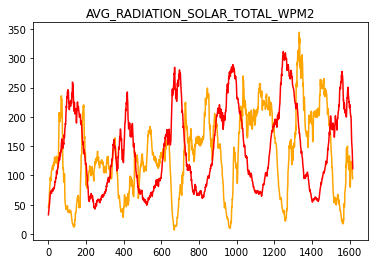

Store No. 18


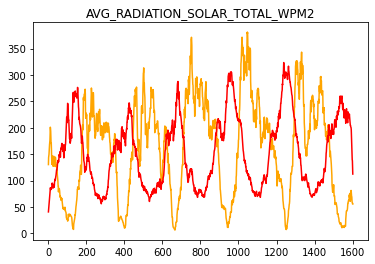

Store No. 19


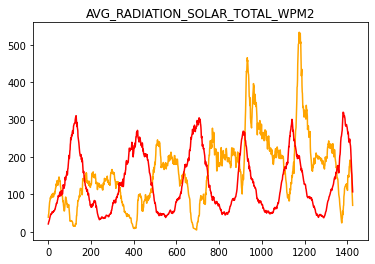

Store No. 20


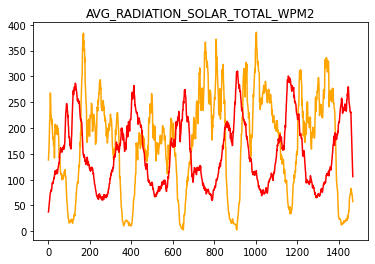

In [36]:
# checking same col for all stores
for i in ["AVG_RADIATION_SOLAR_TOTAL_WPM2"]:
    for j in range(1,21):
        print("Store No. {}".format(j))
        plot(i,j,20)

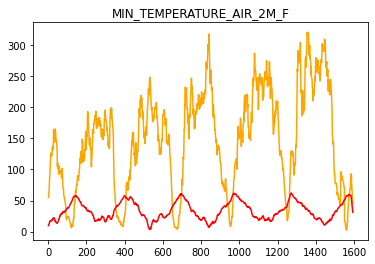

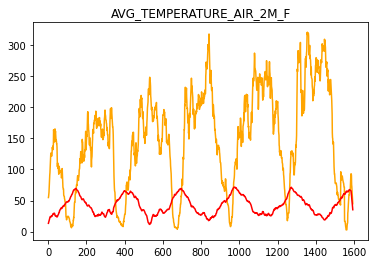

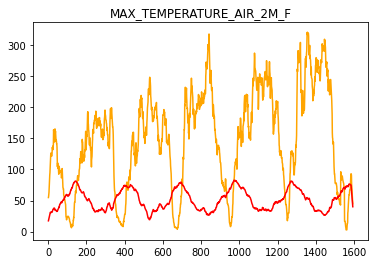

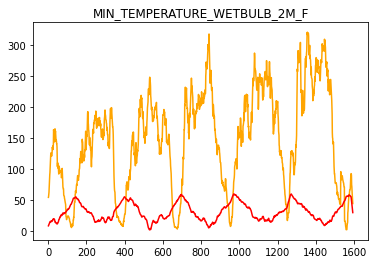

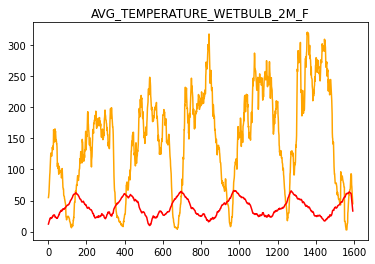

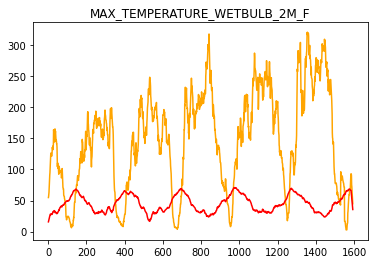

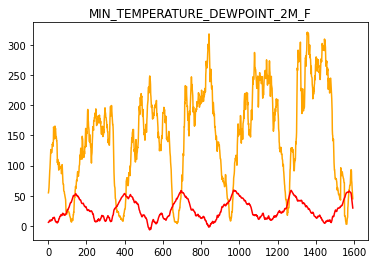

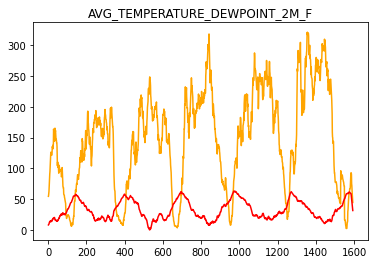

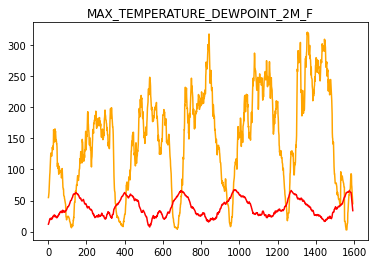

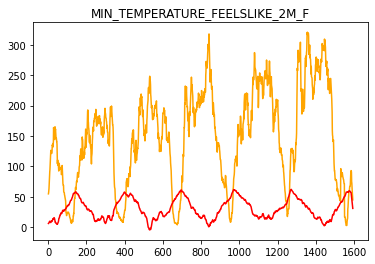

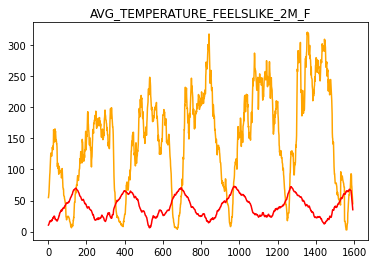

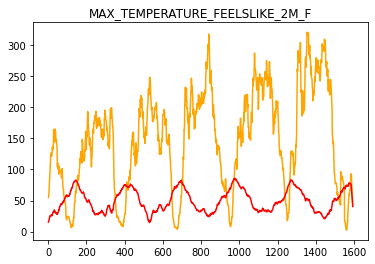

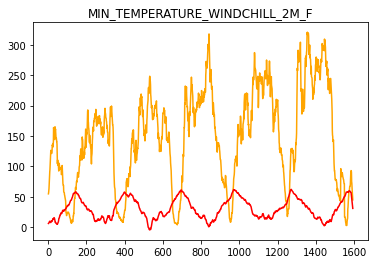

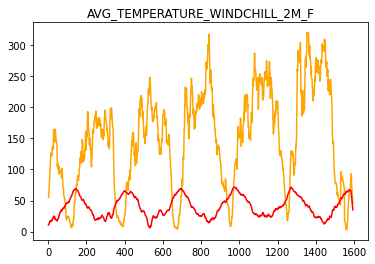

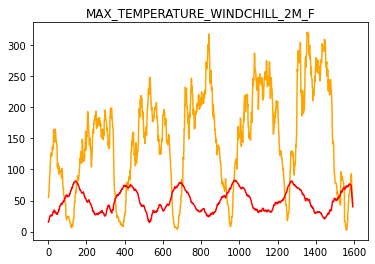

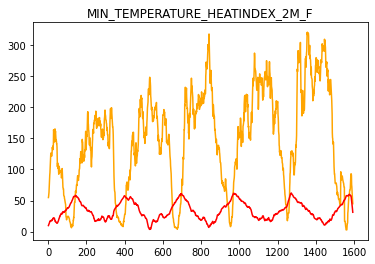

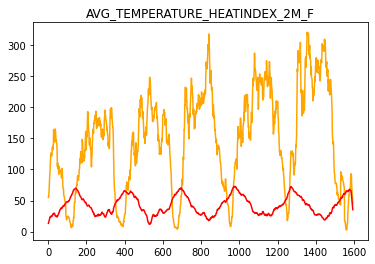

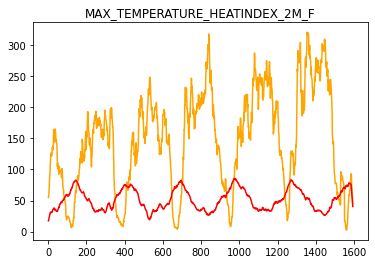

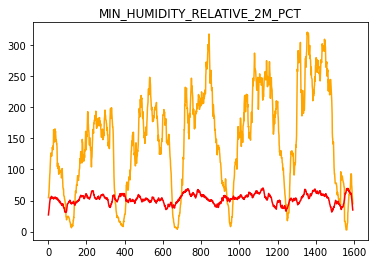

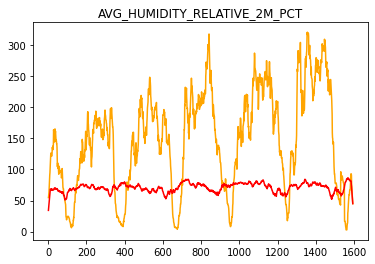

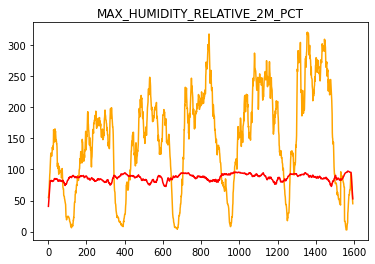

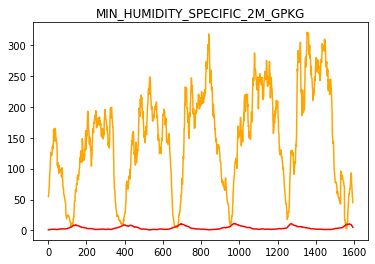

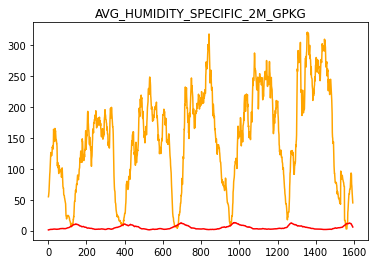

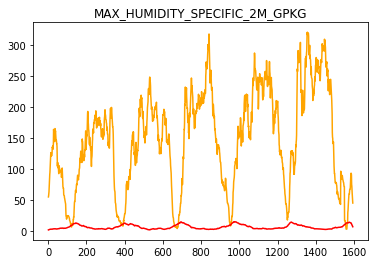

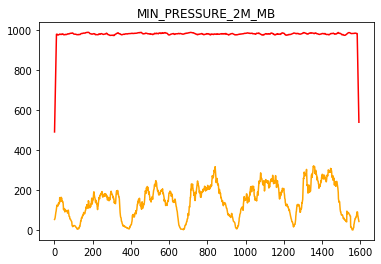

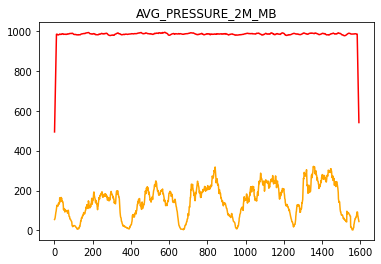

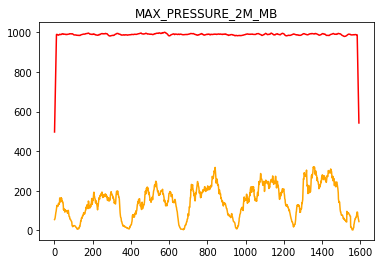

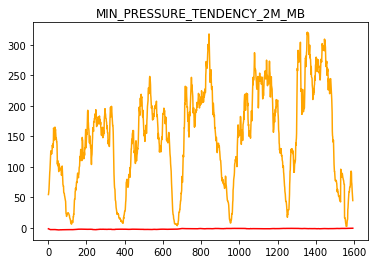

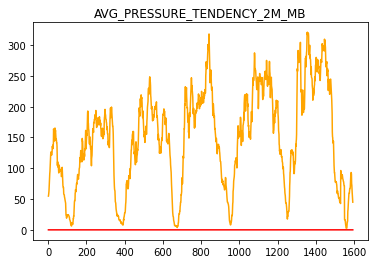

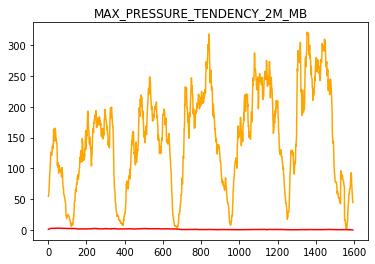

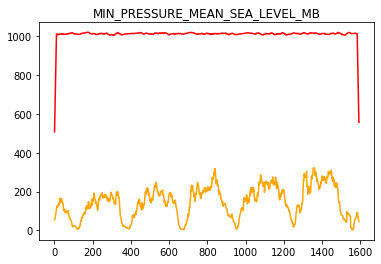

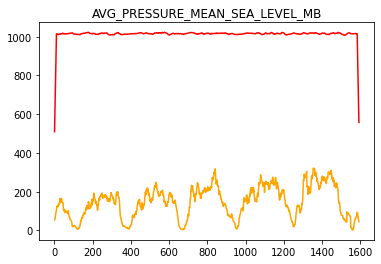

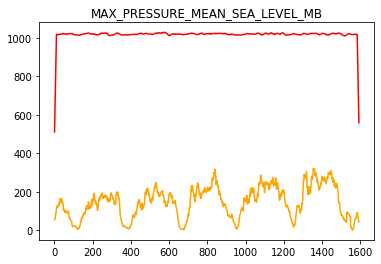

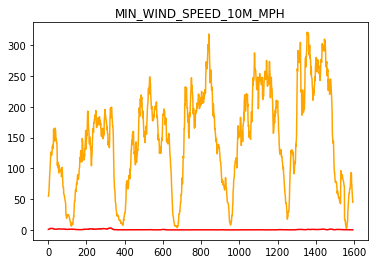

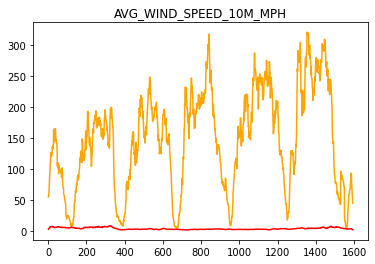

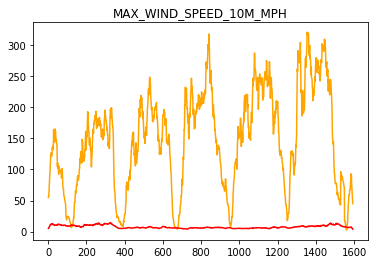

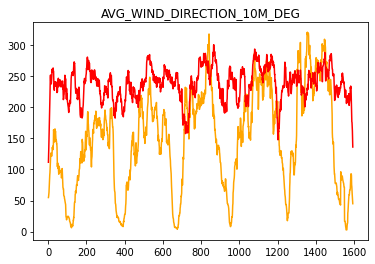

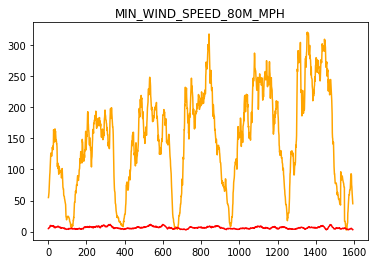

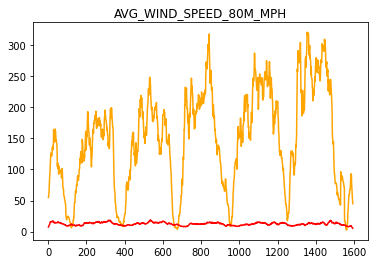

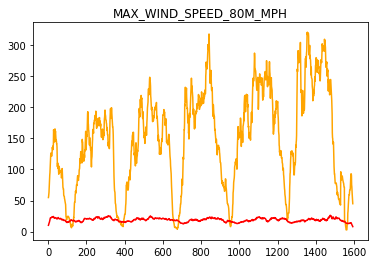

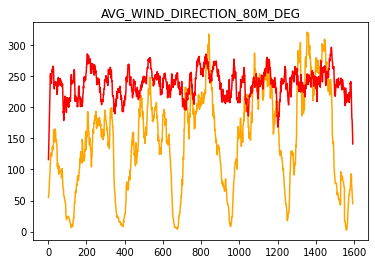

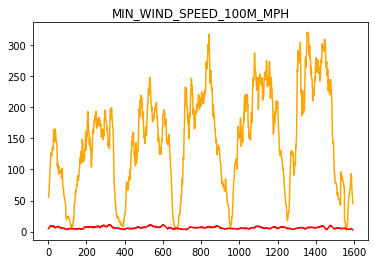

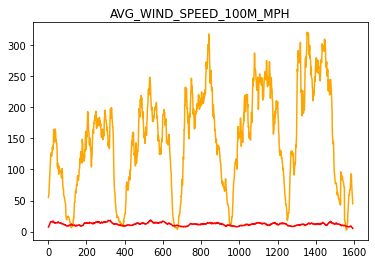

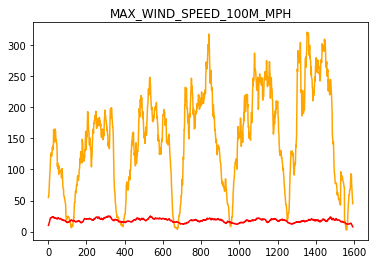

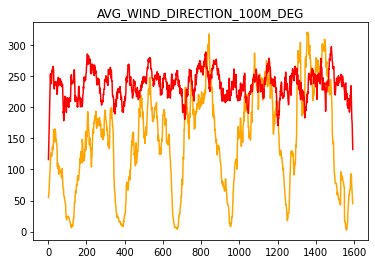

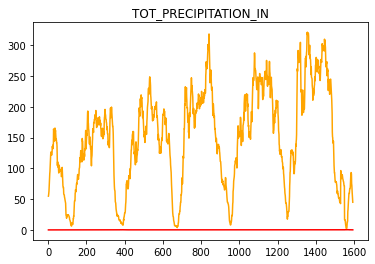

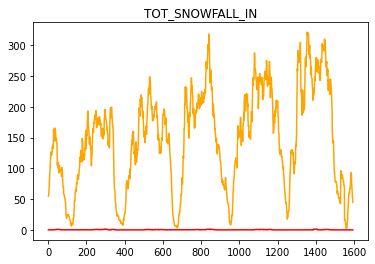

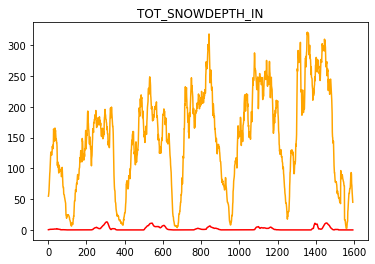

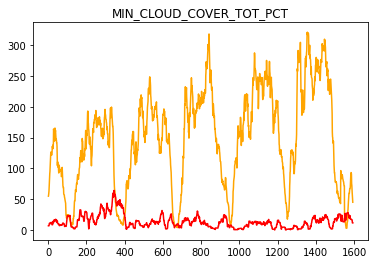

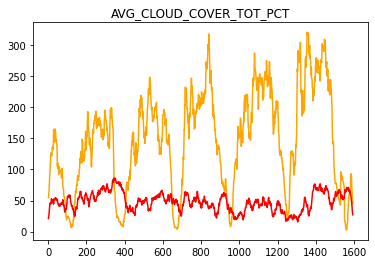

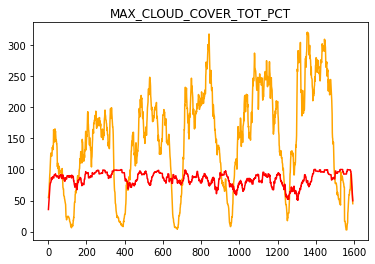

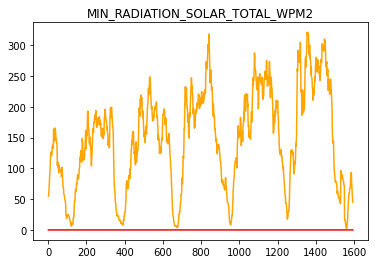

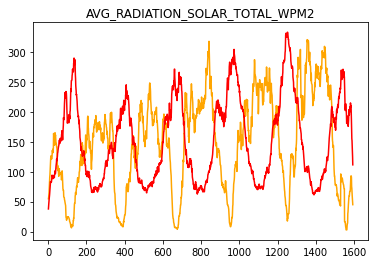

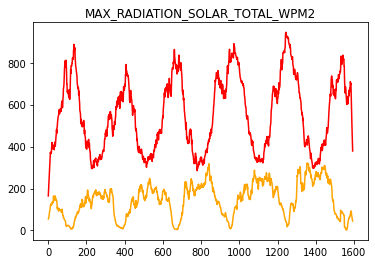

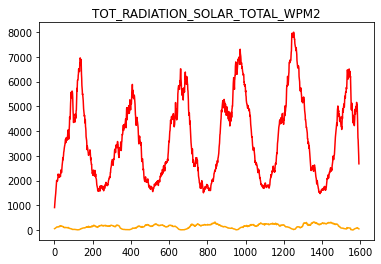

In [37]:
# checking all clolumns for a particular store
for i in cols:
    plot(i,15,20)

In [39]:
dataset.head()

,TIME_DIM_KEY,SCRUB_STORE_NO,SALES_UNITS,unique_ID,DOY_STD,MIN_TEMPERATURE_AIR_2M_F,AVG_TEMPERATURE_AIR_2M_F,MAX_TEMPERATURE_AIR_2M_F,MIN_TEMPERATURE_WETBULB_2M_F,AVG_TEMPERATURE_WETBULB_2M_F,...,TOT_PRECIPITATION_IN,TOT_SNOWFALL_IN,TOT_SNOWDEPTH_IN,MIN_CLOUD_COVER_TOT_PCT,AVG_CLOUD_COVER_TOT_PCT,MAX_CLOUD_COVER_TOT_PCT,MIN_RADIATION_SOLAR_TOTAL_WPM2,AVG_RADIATION_SOLAR_TOTAL_WPM2,MAX_RADIATION_SOLAR_TOTAL_WPM2,TOT_RADIATION_SOLAR_TOTAL_WPM2
0,20160102,1,759,20160102-1,2,26.5,30.4,34.5,25.1,28.7,...,0.0,0.0,16.1,0,57,100,0,32.3,132.0,776.0
1,20160103,1,486,20160103-1,3,26.0,29.1,31.6,24.5,27.2,...,0.0,0.0,15.4,73,94,100,0,49.6,236.0,1190.0
2,20160104,1,326,20160104-1,4,8.3,19.2,25.7,7.9,17.8,...,0.0,0.0,15.5,11,50,94,0,93.2,415.0,2238.0
3,20160105,1,395,20160105-1,5,6.2,19.1,28.7,6.0,18.0,...,0.0,0.0,15.3,19,81,99,0,52.6,214.0,1262.0
4,20160106,1,478,20160106-1,6,24.7,29.6,35.7,23.7,27.8,...,0.0,0.0,15.2,0,63,100,0,80.3,383.0,1928.0


In [40]:
dataset.to_excel("datasets/historic-sales.xlsx")